

## Meeting notes

###  Product ideas:
- A/F: Flag features star trends
- % verified.
pinpoint each reviews, which clusters or phrase are significant in our model.



#### review score per line
1. make a vector on Review basis as indicator
2. Go into every single review, which vector per review.  (Maximum entry of 1, minimum entry of 0)
3. sum up vectors into product level- review vector
4. In sert to logistic regression


create a vector, lasso fitness of the whole product

% varified, unpenalized,

Every single review a score. 
* vector for each product category: create 

#### Next step 
tips:
* give individual reviews higher weight
* individual review have 50 
* over weight reviews, a lot of people find helpful. 





## Steps for Text Features
Input: Review Dataset with A & F labeled [RSC reviews]

1. Save data into dictionaries [by product -> (by category)]
    * Problem: No subset
    
2. Prepare Clean Text data
    * Normalization                (de- Capitalize)
    * Stop words                   (You and I)
    * stemming and lemmatization   (Apple = Apples)
3. Convert Text with nltk.WordPunctTokenizer() into Tokens

### Done Text feature preparation
4. For each category, use build a model with text features

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df= pd.read_csv('RSC_reviews_with_category.csv')

In [4]:
df=df.dropna(axis=1,thresh=len(df)*0.9)
df.head(3)

,Unnamed: 0,source,product,name,date,status,sentiment,topic,author,verified,...,title,text,image,video,reviewid,reviewlink,parent,inputtime,id,category_id2
0,0,amazon.ca,B078N8NR7G,PetSafe 900 Meter Remote Trainer,2018-12-20 08:00,Not Assigned,Not Assigned,Not Assigned,Amazon Customer,True,...,Remboursement,Produit disfonctionnel. J'exige remboursement,No,No,R31B5G60GS531M,https://www.amazon.ca/review/R31B5G60GS531M/re...,B078Y3F7MG,2018-12-22 06:24,B078N8NR7G,pet-supplies
1,1,amazon.ca,B01HO8U5NC,Drinkwell Platinum Pet Fountain 168oz,2019-04-13 08:00,Not Assigned,Not Assigned,Not Assigned,nathalie,True,...,La livraison très rapide merci,J’ai adorer,No,No,RRCY4V48RQBXG,https://www.amazon.ca/review/RRCY4V48RQBXG/ref...,B01MQ1JZ3L,2019-04-15 10:32,B01HO8U5NC,pet-supplies
2,2,amazon.ca,B01HO8U5NC,Drinkwell Platinum Pet Fountain 168oz,2019-04-02 08:00,Not Assigned,Not Assigned,Not Assigned,Conure Mum,True,...,Awesome for my birds,Bought this as a running bird bath for my two ...,Yes,No,R18076F5C879LP,https://www.amazon.ca/review/R18076F5C879LP/re...,B01MQ1JZ3L,2019-04-04 12:02,B01HO8U5NC,pet-supplies


In [5]:
text=df['text']

In [6]:
df.columns

Index(['Unnamed: 0', 'source', 'product', 'name', 'date', 'status',
       'sentiment', 'topic', 'author', 'verified', 'stars', 'pvotes', 'tvotes',
       'title', 'text', 'image', 'video', 'reviewid', 'reviewlink', 'parent',
       'inputtime', 'id', 'category_id2'],
      dtype='object')

# Data Dictionary for product aggregation
Aggregate by Catgory, save text related objects

In [7]:
num_products= len(df['product'].value_counts())
print('there are {} products'.format(num_products))

there are 961 products


In [8]:
unique_product_list=df['product'].unique()

### Split dataframe in to product based sub-table

In [10]:
# product= unique_product_list[1]
#df.loc[df['product']== unique_product_list[1],]
product_dict={}
for product in unique_product_list:
    product_dict[product]= df.loc[df['product']==product,]

In [11]:
print("The product we are interested is {}".format(product))
product_dict[product].head(3)

The product we are interested is B00074L4UO


,Unnamed: 0,source,product,name,date,status,sentiment,topic,author,verified,...,title,text,image,video,reviewid,reviewlink,parent,inputtime,id,category_id2
65282,65282,amazon,B00074L4UO,"PetSafe Gentle Leader Headcollar, No-Pull Dog ...",2019-12-26 08:00,Not Assigned,Not Assigned,Not Assigned,SpringersRGreat,True,...,A big difference,Used correctly overnight changes in walking,No,No,R27TZ0J750C2GJ,https://www.amazon.com/review/R27TZ0J750C2GJ/r...,B07XTY7FR9,2019-12-28 04:46,B00074L4UO,pet-supplies/2975420011
65283,65283,amazon,B00074L4UO,"PetSafe Gentle Leader Headcollar, No-Pull Dog ...",2019-12-25 08:00,Not Assigned,Not Assigned,Not Assigned,Jason,True,...,I guess you get what you pay for,Broke on firsg. Use,No,No,R3RBWJFIK5OMBI,https://www.amazon.com/review/R3RBWJFIK5OMBI/r...,B07XTY7FR9,2019-12-27 08:21,B00074L4UO,pet-supplies/2975420011
65284,65284,amazon,B00074L4UO,"PetSafe Gentle Leader Headcollar, No-Pull Dog ...",2019-12-22 08:00,Not Assigned,Not Assigned,Not Assigned,A. Bell,True,...,"Not perfect, but huge inprovement","After trying other harnesses and collars, I bo...",No,No,RU1BN0A9KIDH4,https://www.amazon.com/review/RU1BN0A9KIDH4/re...,B07XTY7FR9,2019-12-24 15:40,B00074L4UO,pet-supplies/2975420011


In [17]:
sub_df= product_dict[product]
text=sub_df['text']
text.reset_index(drop=True, inplace=True)

In [174]:

from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 

wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    tokens= lemmatizer.lemmatize(tokens)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

#normalize_corpus = np.vectorize(normalize_document)

In [175]:
norm_corpus = normalize_corpus(text)
type(norm_corpus)

numpy.ndarray

# NLP Models

## Bag of word model

In [176]:
from sklearn.feature_extraction.text import CountVectorizer

# class sklearn.feature_extraction.text.CountVectorizer(input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\b\w\w+\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)[source]

cv = CountVectorizer(min_df=0.02,max_df=0.99,max_features=300)
## 0.05 means: 
## 0.99 means: 

In [177]:
cv_fit=cv.fit_transform(norm_corpus)
len(np.asarray(cv_fit.sum(axis=0))[0])

300

In [178]:
freq=np.asarray(cv_fit.sum(axis=0))[0]

In [173]:
cv.get_feature_names()

['able',
 'absorbs',
 'actually',
 'added',
 'adopted',
 'allow',
 'almost',
 'alone',
 'also',
 'always',
 'amount',
 'antitracking',
 'anything',
 'anyway',
 'apart',
 'apparently',
 'available',
 'average',
 'away',
 'bad',
 'bag',
 'basic',
 'basically',
 'best',
 'better',
 'big',
 'bit',
 'bits',
 'blue',
 'bottom',
 'box',
 'boxes',
 'business',
 'buying',
 'cannot',
 'cant',
 'care',
 'cars',
 'cat',
 'cats',
 'change',
 'changing',
 'clay',
 'clean',
 'cleaning',
 'cleanup',
 'clog',
 'clogged',
 'clumping',
 'collection',
 'compared',
 'concept',
 'control',
 'cost',
 'could',
 'crystal',
 'crystals',
 'days',
 'deluxe',
 'design',
 'designed',
 'didnt',
 'different',
 'difficult',
 'doesnt',
 'dont',
 'drain',
 'dust',
 'easier',
 'easily',
 'easy',
 'end',
 'enough',
 'essentially',
 'even',
 'every',
 'everything',
 'everywhere',
 'excess',
 'expense',
 'expensive',
 'experience',
 'extra',
 'fairly',
 'far',
 'find',
 'fine',
 'first',
 'floor',
 'found',
 'four',
 'full'

import pandas as pd
def get_word_frequency(cv):
    names=cv.get_feature_names()
    freq=np.asarray(cv_fit.sum(axis=0))
    print("#Words That occurs more than 1 time: {}".format(len(freq[freq!=1]))
    word_freq =pd.DataFrame({"word":names,"frequency":freq})
    return word_freq

#### Find category word frequency save the top 300 words

In [181]:
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix = cv_matrix.toarray()
cv_matrix.shape

(41, 300)

In [182]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab).head(3)

,able,absorbs,actually,added,adopted,allow,almost,alone,also,always,...,weeks,well,without,wont,work,working,works,worth,would,years
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Bag of N-Grams Model

In [183]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(norm_corpus)
bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
bv_matrix_df= pd.DataFrame(bv_matrix, columns=vocab)
bv_matrix_df.head(3)

,able keep,able recommend,able scoop,absolutely odor,absorb smell,absorbent tray,absorbs liquid,absorbs urine,acceptable locale,accepted alternate,...,would work,wouldnt easily,wouldve thought,wound take,year weve,years old,years well,yellowish corner,youngest used,youre paying
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [201]:
similarity_matrix = cosine_similarity(bv_matrix)
Z = linkage(similarity_matrix, 'ward')
cluster_df=pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')

In [202]:
cluster_df[cluster_df['Cluster Size']>bench_mark]

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
30,69,70,1.41565,9
31,5,71,1.41733,10
32,46,58,1.41906,11
34,61,74,1.47531,11
35,59,75,1.49303,14
37,72,77,1.55547,16
38,73,76,1.8003,25
39,78,79,2.6042,41


##  TF-IDF Model

In [185]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(min_df=0.02,max_df=0.99,max_features=300, use_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()
vocab = tv.get_feature_names()
tv_matrix_df=pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

## Document similarity for TF-IDF

In [186]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1.000000,0.043647,0.000000,0.112148,0.000000,0.034823,0.000000,0.015695,0.000000,0.000000,...,0.000000,0.046376,0.049230,0.000000,0.080327,0.126509,0.000000,0.073812,0.000000,0.063672
1,0.043647,1.000000,0.042748,0.116918,0.076009,0.036304,0.031260,0.190365,0.064757,0.130409,...,0.072557,0.061835,0.186251,0.023766,0.027282,0.045161,0.067098,0.178395,0.020567,0.122008
2,0.000000,0.042748,1.000000,0.000000,0.088663,0.073535,0.088296,0.038430,0.036350,0.150651,...,0.047105,0.072858,0.094643,0.013341,0.015315,0.042592,0.037664,0.046609,0.042578,0.127383
3,0.112148,0.116918,0.000000,1.000000,0.000000,0.093282,0.000000,0.042043,0.000000,0.000000,...,0.000000,0.124230,0.000000,0.000000,0.000000,0.063174,0.000000,0.000000,0.000000,0.151915
4,0.000000,0.076009,0.088663,0.000000,1.000000,0.042348,0.325547,0.223393,0.124813,0.146374,...,0.086635,0.099793,0.172081,0.054774,0.061837,0.071142,0.230744,0.068728,0.279549,0.021142
5,0.034823,0.036304,0.073535,0.093282,0.042348,1.000000,0.042649,0.050530,0.079659,0.059809,...,0.059224,0.116100,0.071293,0.024163,0.098331,0.088025,0.045479,0.084552,0.084584,0.150759
6,0.000000,0.031260,0.088296,0.000000,0.325547,0.042649,1.000000,0.134901,0.047877,0.096249,...,0.098482,0.069696,0.092741,0.080584,0.011199,0.260879,0.129354,0.100402,0.219354,0.125437
7,0.015695,0.190365,0.038430,0.042043,0.223393,0.050530,0.134901,1.000000,0.120233,0.115792,...,0.126799,0.107425,0.234698,0.074924,0.100629,0.058420,0.134429,0.101608,0.117480,0.077232
8,0.000000,0.064757,0.036350,0.000000,0.124813,0.079659,0.047877,0.120233,1.000000,0.246589,...,0.078395,0.037867,0.127355,0.114143,0.023199,0.086159,0.204989,0.106449,0.122225,0.091287
9,0.000000,0.130409,0.150651,0.000000,0.146374,0.059809,0.096249,0.115792,0.246589,1.000000,...,0.111923,0.076605,0.145946,0.046472,0.113904,0.065965,0.151184,0.072187,0.225447,0.063362


### Clustering documents using similarity features

In [188]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(similarity_matrix, 'ward')
cluster_df=pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')

In [190]:
sub_df.shape

(41, 40)

In [196]:
bench_mark=sub_df.shape[1]*0.2
bench_mark

8.0

In [197]:
cluster_df[cluster_df['Cluster Size']>bench_mark]

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
32,70,72,1.53655,9
33,68,73,1.63479,14
34,62,63,1.66876,14
35,69,74,1.6891,18
36,55,75,1.79275,17
37,64,76,1.82015,20
38,71,78,1.86797,24
39,77,79,2.73929,41


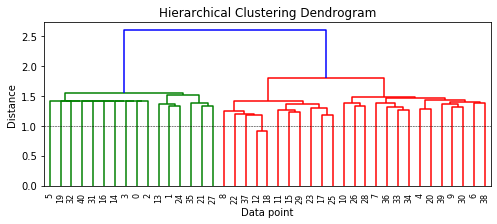

In [207]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)